In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, roc_curve, auc, plot_roc_curve, classification_report

In [3]:
csv_url = 'https://github.com/automoto/big-five-data/blob/master/big_five_scores.csv'
df=pd.read_csv('big_five_scores.csv', index_col=0)

# Preprocessing and Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307313 entries, 1 to 334161
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   country                  307141 non-null  object 
 1   age                      307313 non-null  int64  
 2   sex                      307313 non-null  int64  
 3   agreeable_score          307313 non-null  float64
 4   extraversion_score       307313 non-null  float64
 5   openness_score           307313 non-null  float64
 6   conscientiousness_score  307313 non-null  float64
 7   neuroticism_score        307313 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 21.1+ MB


In [35]:
#Drop all nan values after review that there are less than 0.1%
data = df.dropna()

In [36]:
data.head()

,country,age,sex,agreeable_score,extraversion_score,openness_score,conscientiousness_score,neuroticism_score
case_id,,,,,,,,
1,South Afri,24,1,0.753333,0.496667,0.803333,0.886667,0.426667
3,UK,24,2,0.733333,0.680000,0.786667,0.746667,0.590000
4,USA,36,2,0.880000,0.770000,0.860000,0.896667,0.296667
5,UK,19,1,0.690000,0.616667,0.716667,0.636667,0.563333
6,UK,17,1,0.600000,0.713333,0.646667,0.633333,0.513333


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307141 entries, 1 to 334161
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   country                  307141 non-null  object 
 1   age                      307141 non-null  int64  
 2   sex                      307141 non-null  int64  
 3   agreeable_score          307141 non-null  float64
 4   extraversion_score       307141 non-null  float64
 5   openness_score           307141 non-null  float64
 6   conscientiousness_score  307141 non-null  float64
 7   neuroticism_score        307141 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 21.1+ MB


In [38]:
data.describe()

,age,sex,agreeable_score,extraversion_score,openness_score,conscientiousness_score,neuroticism_score
count,307141.000000,307141.000000,307141.000000,307141.000000,307141.000000,307141.000000,307141.000000
mean,25.193953,1.602557,0.696809,0.672328,0.733943,0.702013,0.574405
std,10.002145,0.489370,0.093565,0.108672,0.087612,0.107376,0.125743
min,10.000000,1.000000,0.200000,0.200000,0.253333,0.206667,0.196667
25%,18.000000,1.000000,0.640000,0.600000,0.673333,0.630000,0.486667
50%,22.000000,2.000000,0.703333,0.680000,0.736667,0.706667,0.570000
75%,29.000000,2.000000,0.763333,0.750000,0.796667,0.776667,0.660000
max,99.000000,2.000000,1.000000,0.993333,0.996667,1.000000,0.996667


In [39]:
gender_count = data['sex'].value_counts(normalize=True)
print(f"The data containes {(gender_count.iloc[0]*100):.2f}% female's surveys and {(gender_count.iloc[1]*100):.2f}% male's surveys")

The data containes 60.26% female's surveys and 39.74% male's surveys


In [40]:
#how many countries are in the data
len(data.country.unique())


235

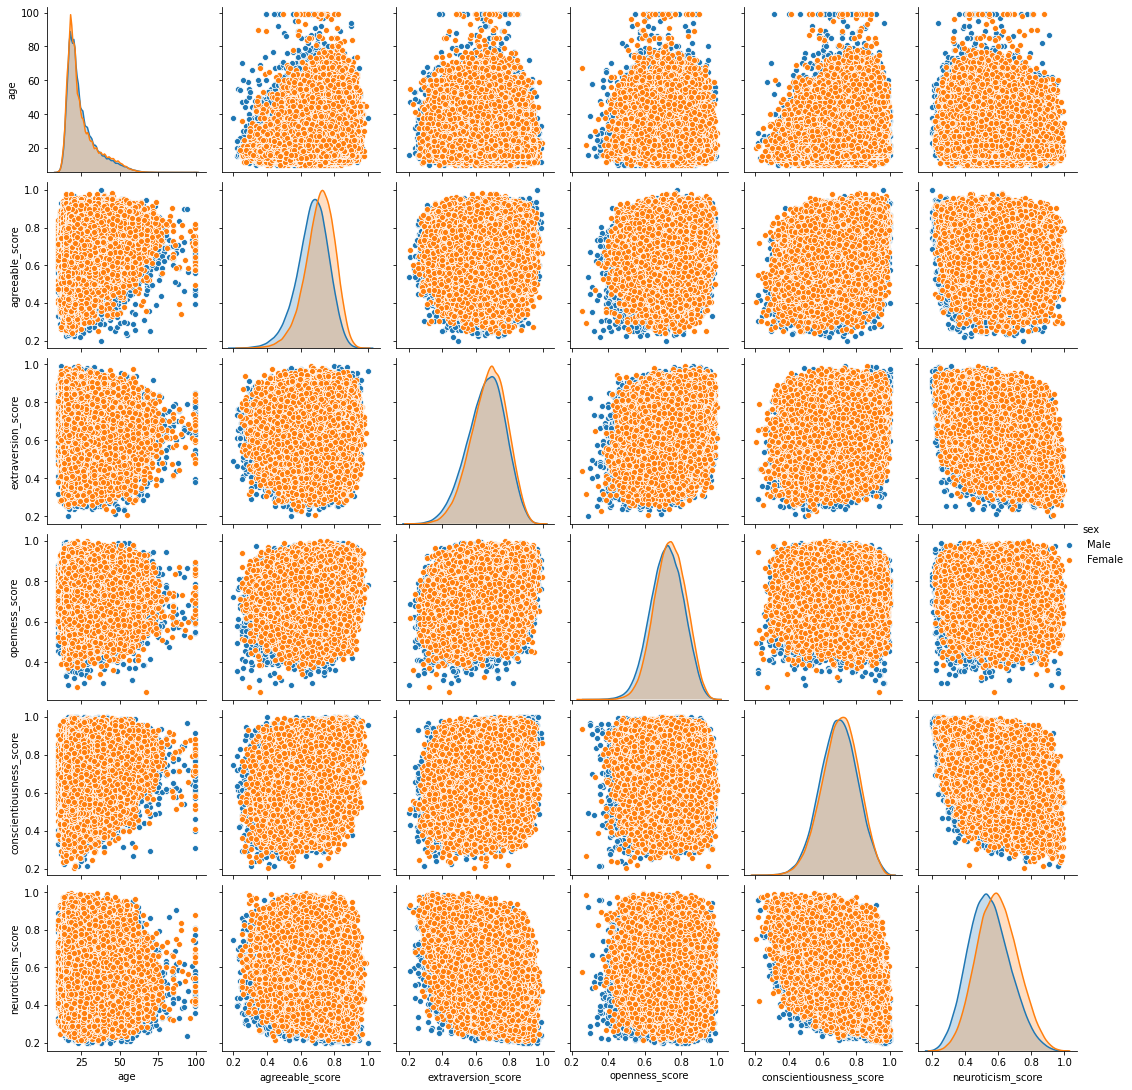

In [96]:
g = sns.pairplot(data, hue='sex')
new_labels = ['Male', 'Female']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
_=g

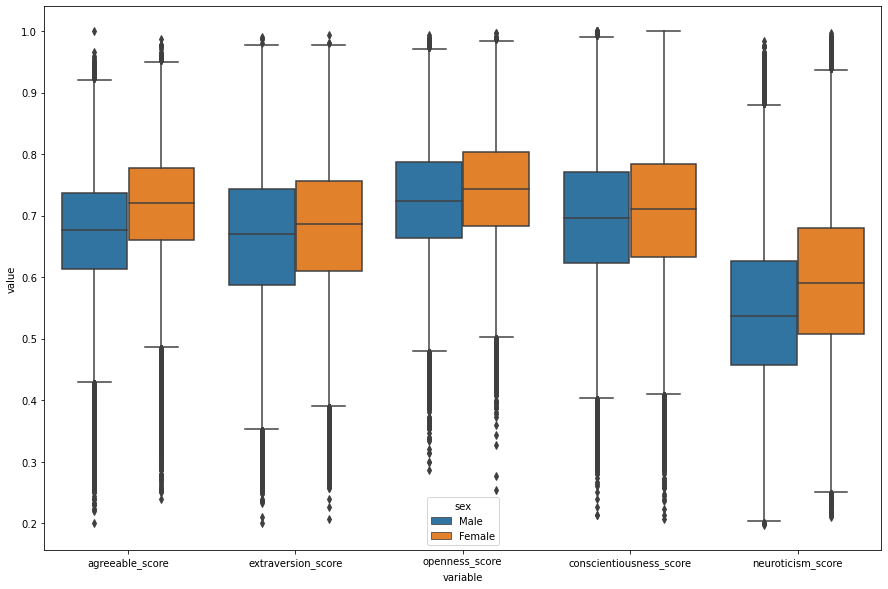

In [97]:
personality_traits = ['agreeable_score', 'extraversion_score', 'openness_score', 'conscientiousness_score','neuroticism_score']
data1 = pd.melt(data, id_vars=['sex'], value_vars=personality_traits)
data1.loc[(data1.sex == 1),'sex'] = 'Male'
data1.loc[(data1.sex == 2),'sex'] = 'Female'
fig, ax = plt.subplots(figsize = (15, 10))
m = sns.boxplot(ax=ax, data=data1, x="variable", y="value", hue="sex")


# Logistic Regression model

In [44]:
def split_df (target_name: str, data: pd.DataFrame):
    """ 
    Split df into random train and test subsets based on target name column

    Parameters
    ----------
    target_name : str
        target column name
    data : DataFrame
        DataFrame  

    return
    ----------
    X_train, X_test, y_train, y_test
    """
    X = data.drop(columns=[target_name])
    y = data[target_name].copy()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

In [45]:
#prediction of sex without the country feature by LogisticRegression model
data2 = data.drop('country', axis=1)
target_name = 'sex'
X_train, X_test, y_train, y_test = split_df(target_name, data2)
Lreg = LogisticRegression().fit(X_train, y_train) 
y_predicted = Lreg.predict(X_test)

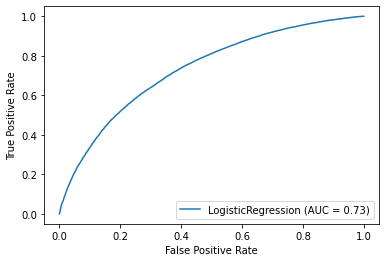

In [46]:
_ = plot_roc_curve(Lreg, X_test, y_test)

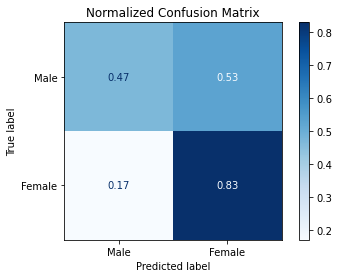

In [47]:
disp = plot_confusion_matrix(Lreg,
                             X_test,
                             y_test,
                             display_labels=['Male', 'Female'],
                             cmap=plt.cm.Blues,
                             normalize="true")
_ = disp.ax_.set_title("Normalized Confusion Matrix")

If the personality survey is of famle, the model can predict it is a female's survey by 83%
But if the personality survey is of male, the model can't predict if it's a male or a famle survey.

In [51]:
target_names = ['Male', 'Female']
report = classification_report(y_test, y_predicted, target_names=target_names)
print(report)

              precision    recall  f1-score   support

        Male       0.65      0.47      0.54     24371
      Female       0.70      0.83      0.76     37058

    accuracy                           0.69     61429
   macro avg       0.68      0.65      0.65     61429
weighted avg       0.68      0.69      0.68     61429



In [102]:
#Build Dataframes of country binary variables and join with data 
countries = pd.get_dummies(data['country'])
data3 = pd.concat([data, countries] ,axis=1)
data3 = data3.drop(columns=['country'])
data3.head()

,age,sex,agreeable_score,extraversion_score,openness_score,conscientiousness_score,neuroticism_score,Afghanista,Albania,Algeria,...,Virgin Isl,W. Samoa,Wake Islan,Wallis and,Western Sa,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
case_id,,,,,,,,,,,,,,,,,,,,,
1,24,1,0.753333,0.496667,0.803333,0.886667,0.426667,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,24,2,0.733333,0.680000,0.786667,0.746667,0.590000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,36,2,0.880000,0.770000,0.860000,0.896667,0.296667,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,19,1,0.690000,0.616667,0.716667,0.636667,0.563333,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,17,1,0.600000,0.713333,0.646667,0.633333,0.513333,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
#prediction of sex with the country categorial features by LogisticRegression model
target_name = 'sex'
X_train1, X_test1, y_train1, y_test1 = split_df(target_name, data3)
Lreg1 = LogisticRegression(max_iter=10000).fit(X_train1, y_train1) 
y_predicted1 = Lreg1.predict(X_test1)
y_predicted2 = Lreg1.predict_proba(X_test1)

In [119]:
y_scores = y_predicted2[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores, pos_label=2)
auc(fpr, tpr)

0.7387825312915481

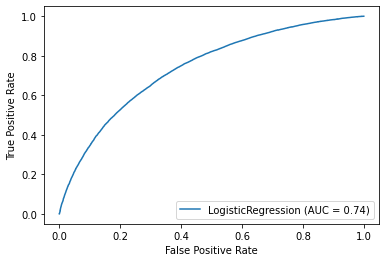

In [104]:
_ = plot_roc_curve(Lreg1, X_test1, y_test1)

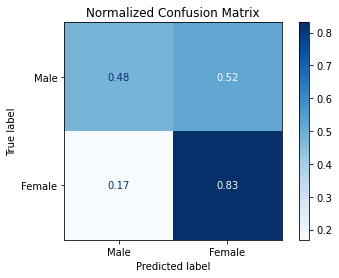

In [131]:
disp1 = plot_confusion_matrix(Lreg1,
                             X_test1,
                             y_test1,
                             display_labels=['Male', 'Female'],
                             cmap=plt.cm.Blues,
                             normalize="true")
_ = disp1.ax_.set_title("Normalized Confusion Matrix")

# Decision Tree model

In [121]:
#prediction of sex without the country feature by DecisionTreeClassifier model
decision_tree = DecisionTreeClassifier()
_ = decision_tree.fit(X_train, y_train)

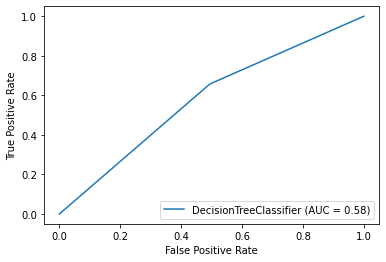

In [122]:
_ = plot_roc_curve(decision_tree, X_test, y_test)

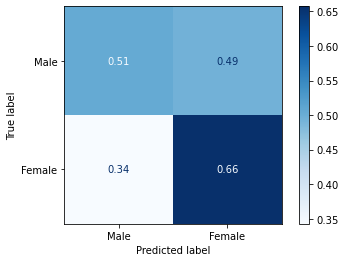

In [157]:
_ = plot_confusion_matrix(decision_tree,
                          X_test,
                          y_test,
                          display_labels=['Male', 'Female'],
                          cmap=plt.cm.Blues,
                          normalize="true")

# Gradient Boosting model


In [159]:
#prediction of sex without the country feature by GradientBoostingClassifier model
gradient_boosting = GradientBoostingClassifier(random_state=0)
_ = gradient_boosting.fit(X_train, y_train)
y_predicted_gb = gradient_boosting.predict(X_test)

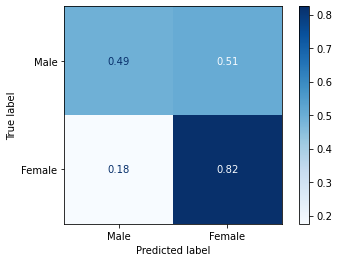

In [164]:
_ = plot_confusion_matrix(gradient_boosting,
                          X_test,
                          y_test,
                          display_labels=['Male', 'Female'],
                          cmap=plt.cm.Blues,
                          normalize="true")

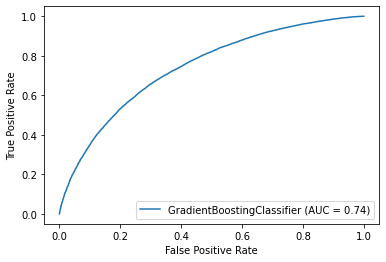

In [165]:
_ = plot_roc_curve(gradient_boosting, X_test, y_test)

In [171]:
#prediction of sex with the country categorial features by GradientBoostingClassifier model
gradient_boosting1 = GradientBoostingClassifier(random_state=0)
_ = gradient_boosting1.fit(X_train1, y_train1)
y_predicted_gb1 = gradient_boosting1.predict(X_test1)

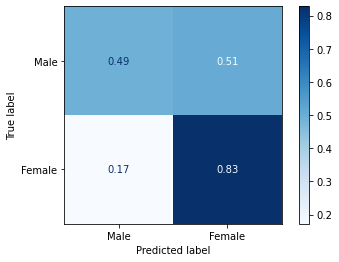

In [172]:
_ = plot_confusion_matrix(gradient_boosting1,
                          X_test1,
                          y_test1,
                          display_labels=['Male', 'Female'],
                          cmap=plt.cm.Blues,
                          normalize="true")

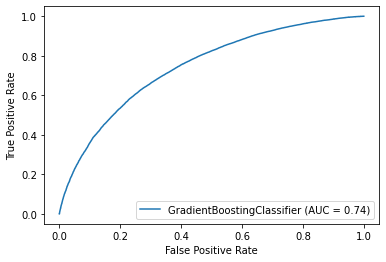

In [173]:
_ = plot_roc_curve(gradient_boosting1, X_test1, y_test1)